### Import

In [141]:
import pandas as pd
import numpy as np
import plotly.express as px
import calendar
from datetime import datetime
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

In [142]:
from google.colab import drive
drive.mount('/content/gdrive')

# directory
%cd '/content/gdrive/My Drive/Oxford/ML_for_Social_Good'

# import updated df from pipeline
df = pd.read_csv('df_formeanencoding.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Oxford/ML_for_Social_Good


### Shapley values — selecting variables for encodings

**Interpretation of Shapley values**: Given the current set of feature values, the contribution of a feature value to the difference between the actual prediction and the mean prediction is the estimated Shapley value.


**Important features** (shapley value > 0.1 or < -0.1) (in model "Build Per Acre Only Yield Per Acre Model")

Positive values:
```
BasalDAP
Harv_hand_rent
BasalUrea_per_Acre
BasalDAP_per_Acre
CultLand
TransplantingIrrigationHours_per_Acre
Latitude
2tdUrea_per_Acre
TpIrrigationHours_Imputed
Harv_hand_rent_per_Acre
TillageDate_ModeDiff
NursingDate_ModeDiff
CropCultLand
Days_bw_Nurs_Harv
1appDaysUrea
2tdUrea
Days_bw_Nurs_Till_ModeDiff
SowTransplantDate_ModeDiff
Days_bw_Nurs_SowTransp
Days_bw_Harv_Thresh
Days_bw_Till_Harv
ThreshingMonth_March
Num_TransDetFactor
```
Negative values:
```
1tdUrea
TpIrrigationHours_Imputed_per_Acre
BasalUrea
CropOrgFYM_per_Acre
Num_TopDressFert
Days_bw_SowTransp_Harv
Num_CropbasalFerts
TransIrriCost
Ganaura_capped
Block_Khaira
Days_bw_Till_Harv_ModeDiff
LandPrepMethod_WetTillagePuddling_True
```


- For categoricals / discrete: go each value, get mean yield (per_acre)
- For continuous: linear regression

In [143]:
subset = df.copy()
subset = subset[["1tdUrea","TpIrrigationHours_Imputed_per_Acre","BasalUrea","CropOrgFYM_per_Acre","Num_TopDressFert","Days_bw_SowTransp_Harv","Num_CropbasalFerts","TransIrriCost",
             "Ganaura_capped","Block_Khaira","Days_bw_Till_Harv_ModeDiff","LandPrepMethod_WetTillagePuddling_True","BasalDAP","Harv_hand_rent","BasalUrea_per_Acre",
             "BasalDAP_per_Acre","CultLand","TransplantingIrrigationHours_per_Acre","Latitude","2tdUrea_per_Acre","TpIrrigationHours_Imputed","Harv_hand_rent_per_Acre",
             "TillageDate_ModeDiff","NursingDate_ModeDiff","CropCultLand","Days_bw_Nurs_Harv","1appDaysUrea","2tdUrea","Days_bw_Nurs_Till_ModeDiff","SowTransplantDate_ModeDiff",
             "Days_bw_Nurs_SowTransp","Days_bw_Harv_Thresh","Days_bw_Till_Harv","ThreshingMonth_March","Num_TransDetFactor","Yield","Yield_per_Acre"]]
subset

,1tdUrea,TpIrrigationHours_Imputed_per_Acre,BasalUrea,CropOrgFYM_per_Acre,Num_TopDressFert,Days_bw_SowTransp_Harv,Num_CropbasalFerts,TransIrriCost,Ganaura_capped,Block_Khaira,Days_bw_Till_Harv_ModeDiff,LandPrepMethod_WetTillagePuddling_True,BasalDAP,Harv_hand_rent,BasalUrea_per_Acre,BasalDAP_per_Acre,CultLand,TransplantingIrrigationHours_per_Acre,Latitude,2tdUrea_per_Acre,TpIrrigationHours_Imputed,Harv_hand_rent_per_Acre,TillageDate_ModeDiff,NursingDate_ModeDiff,CropCultLand,Days_bw_Nurs_Harv,1appDaysUrea,2tdUrea,Days_bw_Nurs_Till_ModeDiff,SowTransplantDate_ModeDiff,Days_bw_Nurs_SowTransp,Days_bw_Harv_Thresh,Days_bw_Till_Harv,ThreshingMonth_March,Num_TransDetFactor,Yield,Yield_per_Acre
0,0.546620,-0.108738,1.269875,-0.129628,0.25,0.419389,0.2,-0.443788,-0.293179,False,-0.275903,False,-1.106005,-0.636844,1.367624,-1.487400,0.560165,-0.126266,0.157991,-0.568455,-0.071751,-0.690850,0.618240,0.001957,0.560362,0.210927,0.229730,-0.477626,0.552657,-0.400379,-0.554953,-1.184119,-0.275903,False,1.0,600.0,1920.000000
1,1.089515,-0.108738,0.258647,-0.129628,0.25,0.938271,0.4,-0.623574,-0.293179,False,0.304493,True,0.569072,-0.633100,0.213487,0.412808,-0.092617,-0.126266,0.093092,-0.568455,-0.071751,-0.687496,0.475444,-0.587460,0.039792,1.036230,0.513514,-0.477626,0.881873,-0.486435,0.137741,-0.038990,0.304493,False,1.0,600.0,1920.000000
2,-0.539171,-0.057418,-0.752581,-0.098717,0.25,0.575054,0.2,-0.731445,-0.169937,False,2.151206,False,-0.659318,-0.037882,-0.940650,-0.418533,-0.642329,-0.065483,0.000000,-0.568455,-0.096613,0.440957,-0.809713,-0.587460,-0.555145,1.913116,0.864865,-0.477626,-0.303305,1.578916,2.908514,0.000497,2.151206,False,0.6,225.0,1518.750000
3,-0.539171,-0.099407,-0.449213,-0.129628,0.25,1.457152,0.4,NaN,-0.169937,False,2.362259,False,-0.435974,-0.337363,-0.453749,-0.418533,-0.470544,NaN,0.000000,-0.568455,-0.096613,-0.313581,-1.809279,-0.840067,-0.369227,1.552045,0.054054,-0.477626,-1.027581,-0.744604,0.137741,-0.117964,2.362259,False,1.0,468.0,2106.000000
4,2.175306,-0.093808,2.281103,-0.129628,0.25,1.197712,0.4,-0.204073,-0.293179,False,0.515546,True,0.569072,-0.636844,1.367624,-0.220595,1.075520,-0.108583,0.157991,-0.568455,0.027695,-0.690850,0.546842,-0.503257,1.304034,1.242556,0.337838,-0.477626,0.881873,-0.486435,0.022292,-1.105145,0.515546,False,0.8,550.0,1173.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5155,0.329462,-0.155393,-0.752581,-0.102152,0.25,0.730718,0.2,-0.443788,-0.293179,True,0.357256,False,0.234056,0.860559,-0.940650,-0.537296,-0.298759,-0.181523,0.052707,0.815214,-0.121474,0.147526,0.832432,0.675576,-0.332044,0.571997,0.297297,2.031884,0.223441,0.374128,-0.439504,-0.315400,0.357256,False,0.6,NaN,NaN
5156,-1.082066,-0.132065,-0.752581,-0.003696,0.00,-1.448585,0.2,-0.204073,-0.293179,False,-1.278404,True,1.127431,-0.075318,-0.940650,2.867243,-0.126974,-0.153894,0.298935,-0.568455,-0.146336,0.173725,-0.309929,1.012385,-0.406411,-2.058659,NaN,-0.477626,-1.093425,-0.056153,-1.478544,-0.986683,-1.278404,False,0.8,NaN,NaN
5157,-0.430592,-0.114958,-0.752581,0.374101,0.25,0.056172,0.4,-0.443788,-0.293179,False,-0.539719,False,-0.435974,0.111858,-0.940650,0.254457,-0.642329,-0.133633,1.000000,0.699909,-0.146336,0.846172,-0.381327,-0.755864,-0.815430,-0.304888,0.391892,0.149752,0.223441,-1.433054,-0.901300,-0.591811,-0.539719,False,0.6,NaN,NaN
5158,-0.864908,-0.142329,-0.752581,-0.129628,0.50,0.626942,0.0,0.275356,-0.293179,False,0.093440,False,-1.106005,-0.524538,-0.940650,-1.487400,-0.642329,-0.166051,0.065242,-0.061109,-0.146336,-0.552518,0.761035,-0.755864,-0.555145,1.139393,0.391892,-0.059374,1.276933,0.029903,1.061332,1.343063,0.093440,False,0.4,NaN,NaN


In [144]:
#for col in subset.columns:
#  print(col, subset[col].value_counts())

In [145]:
# list of cat / discrete variables
catcols = ["Num_TopDressFert","Num_CropbasalFerts","Block_Khaira","LandPrepMethod_WetTillagePuddling_True","Latitude","ThreshingMonth_March","Num_TransDetFactor"]

# list of continuous variables
continuouscols = ["1tdUrea","TpIrrigationHours_Imputed_per_Acre","BasalUrea","CropOrgFYM_per_Acre","Days_bw_SowTransp_Harv","TransIrriCost","Ganaura_capped",
                  "Days_bw_Till_Harv_ModeDiff","BasalDAP","Harv_hand_rent_per_Acre","BasalUrea_per_Acre","BasalDAP_per_Acre","CultLand","TransplantingIrrigationHours_per_Acre",
                  "2tdUrea_per_Acre","TillageDate_ModeDiff","NursingDate_ModeDiff","CropCultLand","Days_bw_Nurs_Harv","1appDaysUrea","2tdUrea","Days_bw_Nurs_Till_ModeDiff",
                  "SowTransplantDate_ModeDiff","Days_bw_Nurs_SowTransp","Days_bw_Harv_Thresh","Days_bw_Till_Harv"
                  ]

### Frequency encoding for categorical / discrete variables

In [146]:
for col in catcols:
  dico = subset[col].value_counts().to_dict()
  newlabel = str(col) + str("_freqencoding")
  subset[newlabel] = subset[col]
  subset[newlabel] = subset[newlabel].replace(dico)

### Yield_per_Acre mean encoding for categorical / discrete variables

In [147]:
df.groupby("Num_TopDressFert")["Yield_per_Acre"].mean()

Num_TopDressFert
0.00    1917.114279
0.25    1971.305057
0.50    1995.967717
0.75    1939.666667
1.00            NaN
Name: Yield_per_Acre, dtype: float64

In [148]:
df.loc[df["Num_TopDressFert"]==1].Yield
# There are 2 rows that have a Num_TopDressFert value that doesn't exist in the training set, so I'll replace the NaN in the mean encoding with that of the "0.75" value

3889   NaN
4175   NaN
Name: Yield, dtype: float64

In [149]:
subset.groupby("Num_CropbasalFerts")["Yield_per_Acre"].mean()

Num_CropbasalFerts
0.0    1667.604965
0.2    1947.782024
0.4    1989.727984
0.6    2635.738319
0.8    1940.714286
1.0    1943.333333
Name: Yield_per_Acre, dtype: float64

In [150]:
subset.groupby("Latitude")["Yield_per_Acre"].mean()
# Same here; will replace the missing mean encoding for 0.069 with the mean for 0.065

Latitude
0.000000    2039.794302
0.032854    2838.000000
0.034799    2121.462676
0.052707    2003.958346
0.065242    2098.655939
0.069806            NaN
0.093092    2079.079001
0.157991    1989.868131
0.298935    1703.371043
0.317464    1632.466079
1.000000    1807.064676
Name: Yield_per_Acre, dtype: float64

In [151]:
# Mean encoding for categorical columns on Yield_per_Acre
for col in catcols:
  dico = subset.groupby([col])["Yield_per_Acre"].mean().to_dict()
  newlabel = str(col) + str("_meanencoding")
  subset[newlabel] = subset[col]
  subset[newlabel] = subset[newlabel].replace(dico)

In [152]:
# Sorting out the rows with missing values (due to them having values that aren't represented in the training set) by using the mean for the closest value
subset.loc[subset["Num_TopDressFert"]==1, "Num_TopDressFert_meanencoding"] = subset.loc[subset["Num_TopDressFert"]==0.75].Yield_per_Acre.mean()
subset.loc[(subset["Latitude"]>0.065) & (subset["Latitude"]<0.07), "Latitude_meanencoding"] = subset.loc[(subset["Latitude"]>0.06) & (subset["Latitude"]<0.07)].Yield_per_Acre.mean()

### Linear regression for continuous variables

In [153]:
# locating columns that have NaNs

for col in continuouscols:
  print(col)
  print(train[col].isnull().sum())

# -> TransIrriCost, TransplantingIrrigationHours_per_Acre, NursingDate_ModeDiff, Days_bw_Nurs_Harv, 1appDaysUrea, Days_bw_Nurs_Till_ModeDiff, Days_bw_Nurs_SowTransp

1tdUrea
0
TpIrrigationHours_Imputed_per_Acre
0
BasalUrea
0
CropOrgFYM_per_Acre
0
Days_bw_SowTransp_Harv
0
TransIrriCost
882
Ganaura_capped
0
Days_bw_Till_Harv_ModeDiff
0
BasalDAP
0
Harv_hand_rent_per_Acre
0
BasalUrea_per_Acre
0
BasalDAP_per_Acre
0
CultLand
0
TransplantingIrrigationHours_per_Acre
193
2tdUrea_per_Acre
0
TillageDate_ModeDiff
0
NursingDate_ModeDiff
83
CropCultLand
0
Days_bw_Nurs_Harv
83
1appDaysUrea
556
2tdUrea
0
Days_bw_Nurs_Till_ModeDiff
83
SowTransplantDate_ModeDiff
0
Days_bw_Nurs_SowTransp
83
Days_bw_Harv_Thresh
0
Days_bw_Till_Harv
0


In [154]:
have_nans = ["TransIrriCost", "TransplantingIrrigationHours_per_Acre", "NursingDate_ModeDiff", "Days_bw_Nurs_Harv", "1appDaysUrea", "Days_bw_Nurs_Till_ModeDiff",
             "Days_bw_Nurs_SowTransp"]

continuouscols2 = [x for x in continuouscols if x not in have_nans]

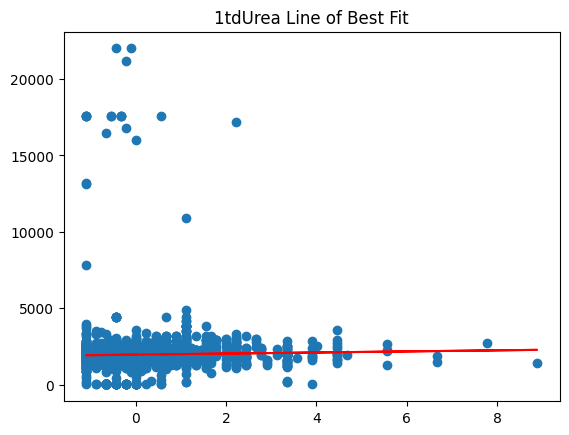

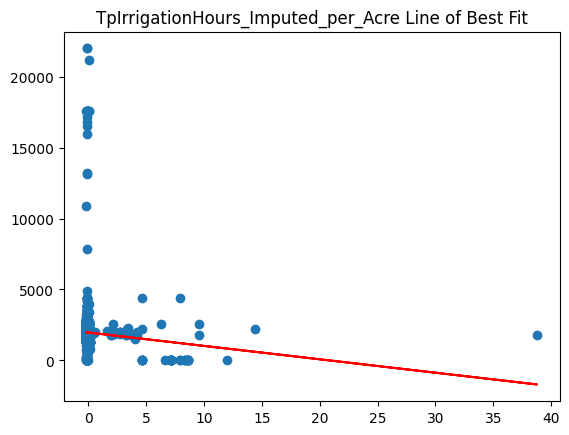

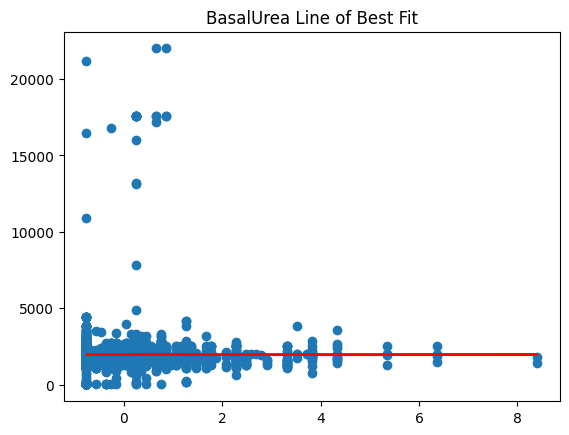

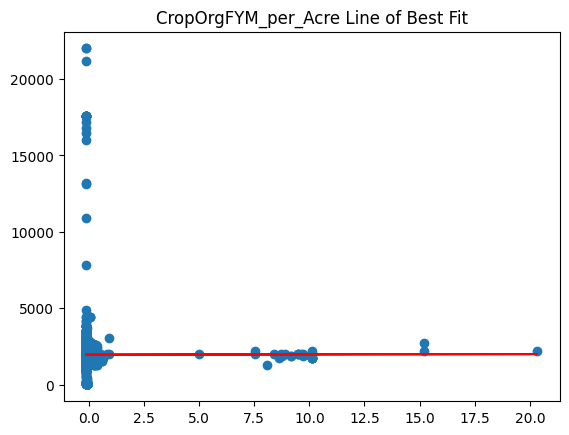

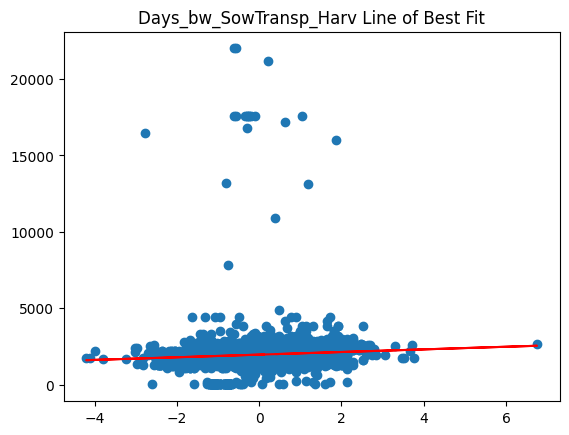

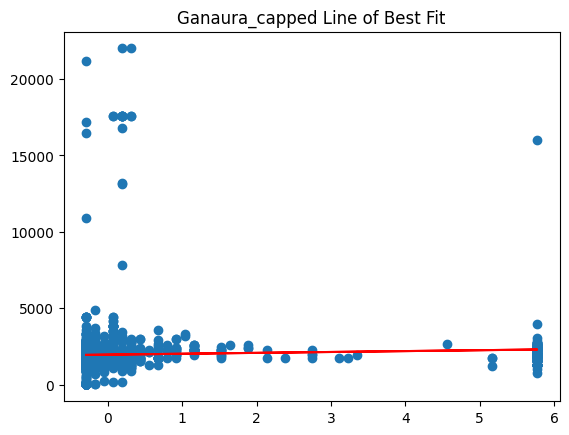

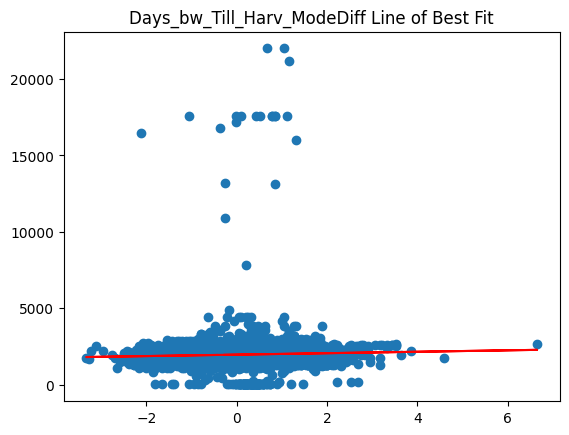

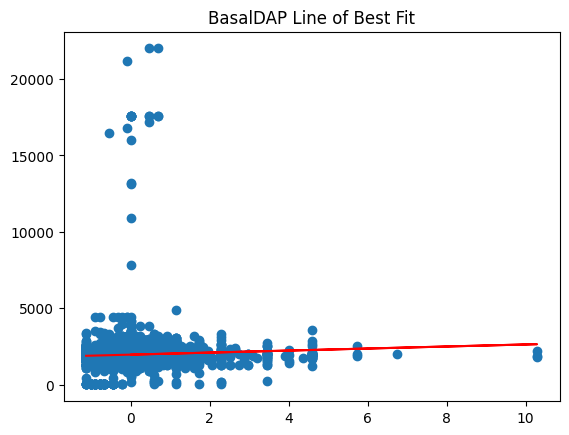

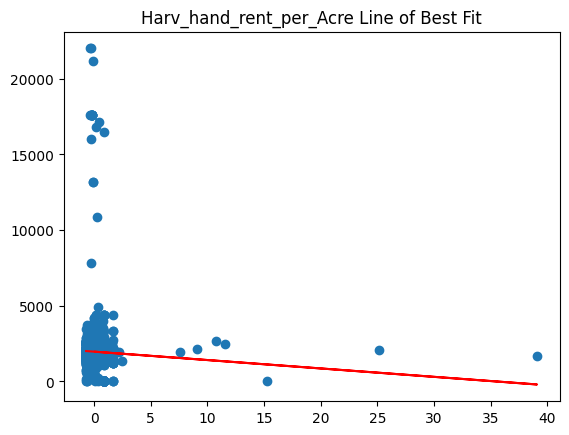

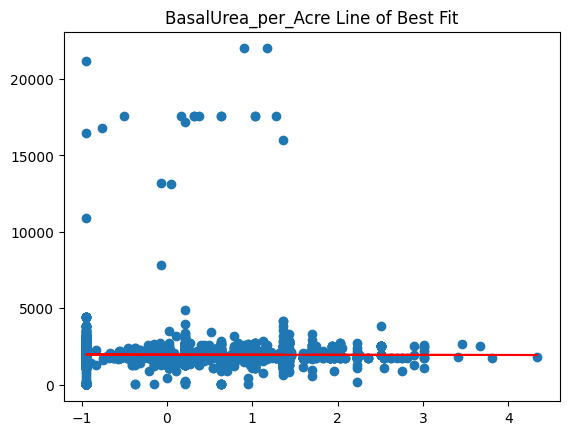

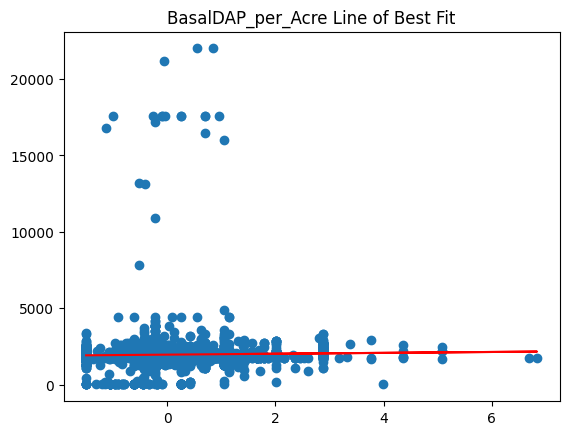

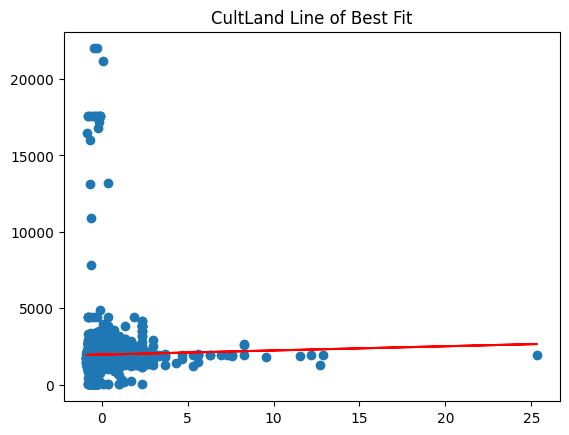

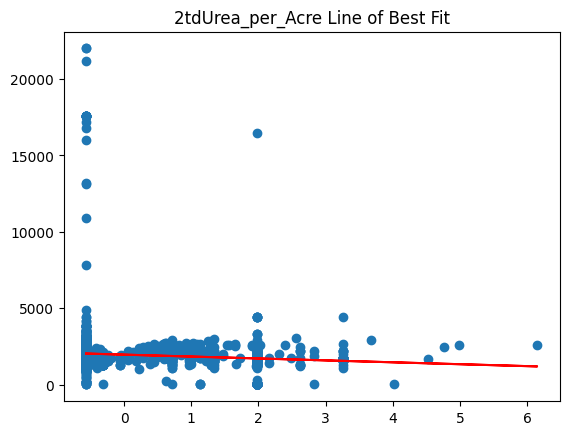

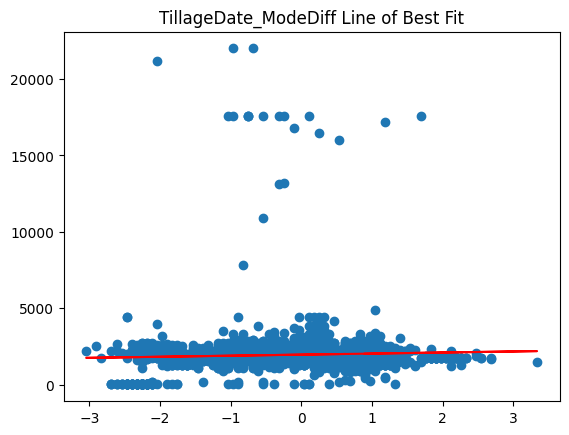

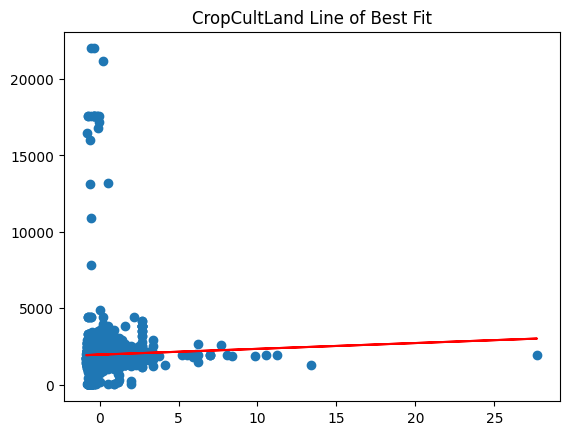

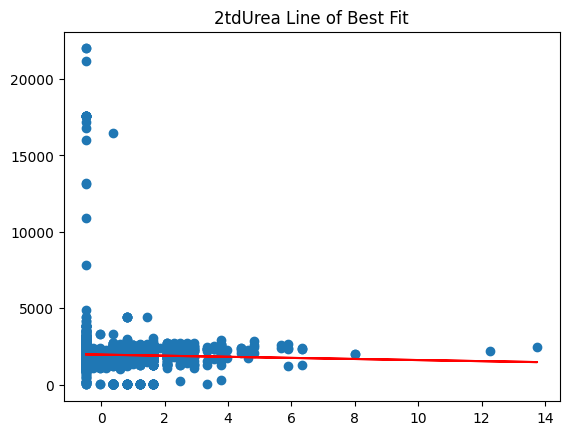

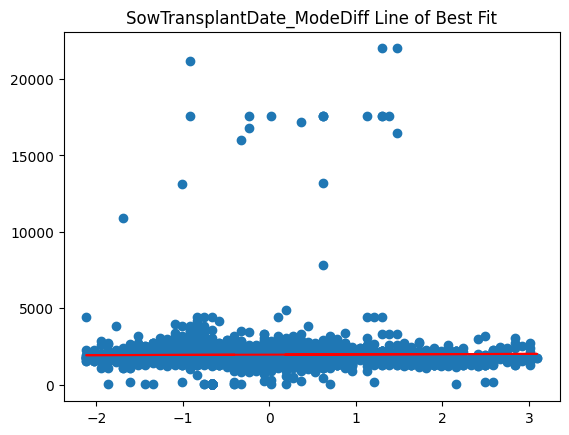

In [ ]:
# Linear regression

for col in continuouscols2:
  # Perform linear regression
  slope, intercept = np.polyfit(train[col], train['Yield_per_Acre'], 1)

  # Plot
  plt.scatter(train[col], train['Yield_per_Acre'])
  plt.plot(train[col], slope * train[col] + intercept, color='red')
  plt.title(str(col) + ' Line of Best Fit')
  plt.show()

In [ ]:
# Listing columns for which the linear regression might be helpful
linearregression = ["Days_bw_Till_Harv","Days_bw_Harv_Thresh","SowTransplantDate_ModeDiff","TillageDate_ModeDiff","BasalDAP_per_Acre","BasalUrea_per_Acre",
                    "Ganaura_capped","Days_bw_SowTransp_Harv","1tdUrea"]

In [ ]:
from sklearn.linear_model import LinearRegression

for col in linearregression:
  # Train using the train set
  lr = LinearRegression()
  lr.fit(train[col].values.reshape(-1, 1), train["Yield_per_Acre"])
  # Predictions for entire dataset
  pred = lr.predict(subset[col].values.reshape(-1, 1))
  newlabel = str(col) + str("_LRpred")
  subset[newlabel] = pred

### Listing the newly added variables

In [ ]:
newfeatures = ['Num_TopDressFert_freqencoding',
               'Num_CropbasalFerts_freqencoding',
               'Block_Khaira_freqencoding',
               'LandPrepMethod_WetTillagePuddling_True_freqencoding',
               'Latitude_freqencoding',
               'ThreshingMonth_March_freqencoding',
               'Num_TransDetFactor_freqencoding',
               'Num_TopDressFert_meanencoding',
               'Num_CropbasalFerts_meanencoding',
               'Block_Khaira_meanencoding',
               'LandPrepMethod_WetTillagePuddling_True_meanencoding',
               'Latitude_meanencoding',
               'ThreshingMonth_March_meanencoding',
               'Num_TransDetFactor_meanencoding',
               'Days_bw_Till_Harv_LRpred',
               'Days_bw_Harv_Thresh_LRpred',
               'SowTransplantDate_ModeDiff_LRpred',
               'TillageDate_ModeDiff_LRpred',
               'BasalDAP_per_Acre_LRpred',
               'BasalUrea_per_Acre_LRpred',
               'Ganaura_capped_LRpred',
               'Days_bw_SowTransp_Harv_LRpred',
               '1tdUrea_LRpred'
               ]